## Bike Sharing Assignment

## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Step to be followed
1. Importing neccessary Libraries
2. Loadind the dataset
3. Understanding and checking the data
4. Exploratory data analysis
5. Data preprocessing
6. Preparing data for the model
7. Modelling and feature selection
8. Final Modelling 
9. Assumptions
10. Evaluating the model

#### 1. Importing Libaries

In [1]:
# for numerical computation
import pandas as pd
import numpy as np

# for EDA
import matplotlib.pyplot as plt
import seaborn as sns

#for Modeling and feature scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#Evaluating model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_error

## Extra
import warnings
warnings.filterwarnings(action="ignore")


### 2. Data Loading

In [2]:
#Loading Data
bike= pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data dictionary
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### 3. Understanding and checking the data

In [3]:
# checking shape of data
bike.shape

(730, 16)

In [4]:
#checking info of the data
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**We can see there are no null values and and there is only one object column dteday, to correct the column type we will deal later**

## Removing unwanted column
- **instant**: We will drop the instant as it is the serial number and nothing to do with the modelling.
- **dteday**: We can remove this column as we already have month and year as separte column. Also Machine learning do not take the date column direclty. In case we have to use this in model we have to convert it in date type and extract relevant month,date, year etc to place in the for use in Model. But Since here we already have so we will drop it directly.
- **casual and registered**:  We have the column cnt which is sum of the casual and the registered. also we have to predict total number of the bike not the segregated one so we can drop these two column.

In [5]:
#dropping unwanted column
drop_col=['instant','dteday','casual','registered']
bike.drop(drop_col,axis=1, inplace=True)

In [6]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
# describe the data
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [8]:
# checking duplicates
bike.duplicated().sum()

0

**There are no duplicates present in the data**

### 4.EDA

In [9]:
#checking the unique value
bike.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [10]:
#segregating catogorical and continious column on basis of data dictionary and unique value information
cont_col=['temp','atemp','hum','windspeed','cnt']
cat_col=['season','yr','mnth','holiday','weekday','workingday','weathersit']



In [11]:
# sanity check
len(cont_col)+len(cat_col),bike.shape[1]

(12, 12)

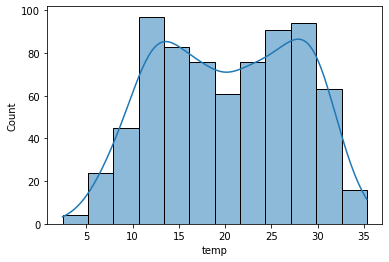

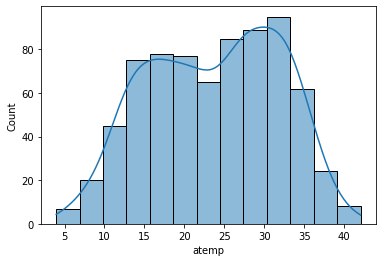

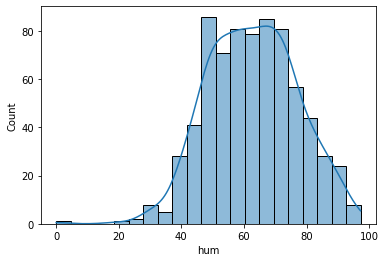

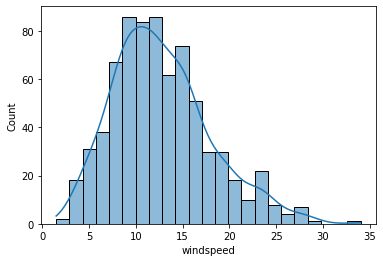

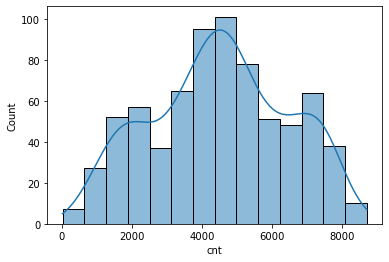

In [12]:
# Histogram of continious column
for i in cont_col:
    sns.histplot(bike[i],kde=True)
    plt.show()

**We can see most of the data is normally disributed there is no long tail left or right , so we will keep the data as it is,  we do not have to do any cleaning** 

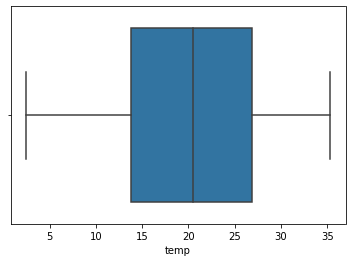

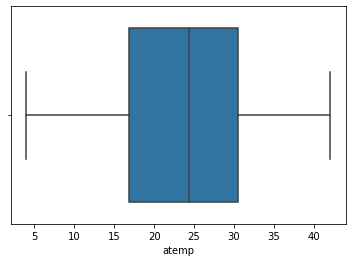

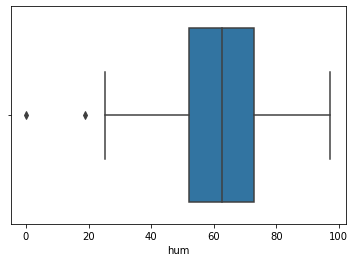

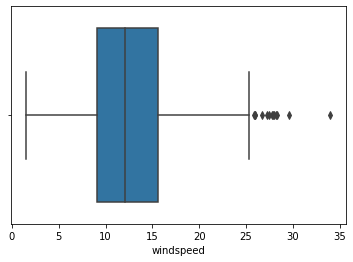

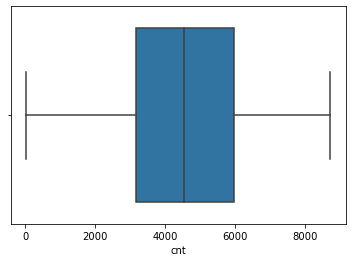

In [13]:
#Box plot of all the category column
for i in cont_col:
    sns.boxplot(x=bike[i])
    plt.show()

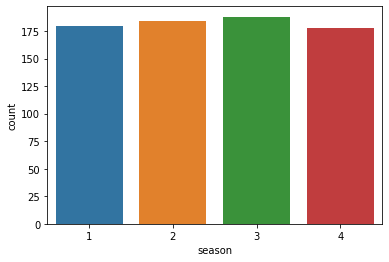

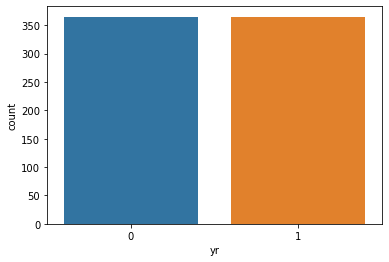

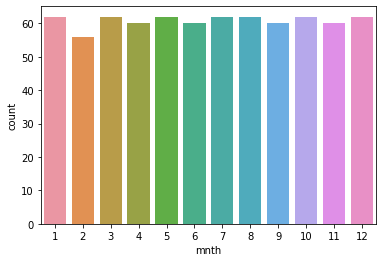

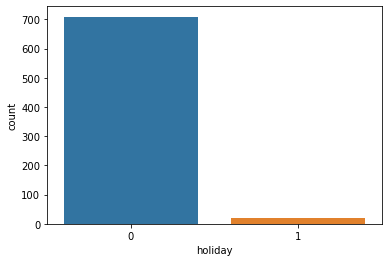

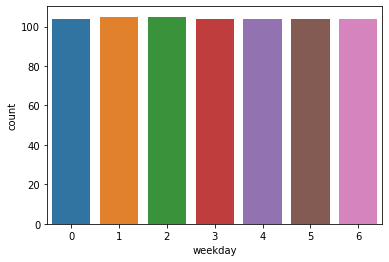

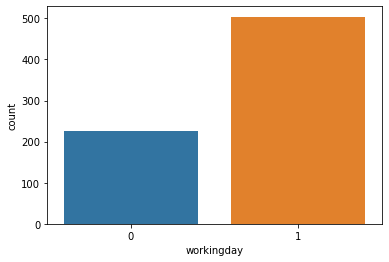

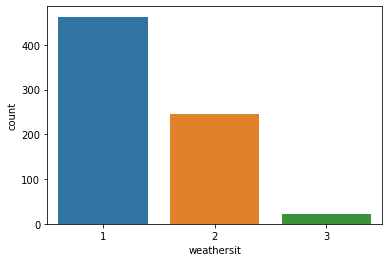

In [14]:
# Count Plot of the categorical column
for i in cat_col:
    sns.countplot(bike[i])
    plt.show()

**From above we can see the unique value count of the categorical column**

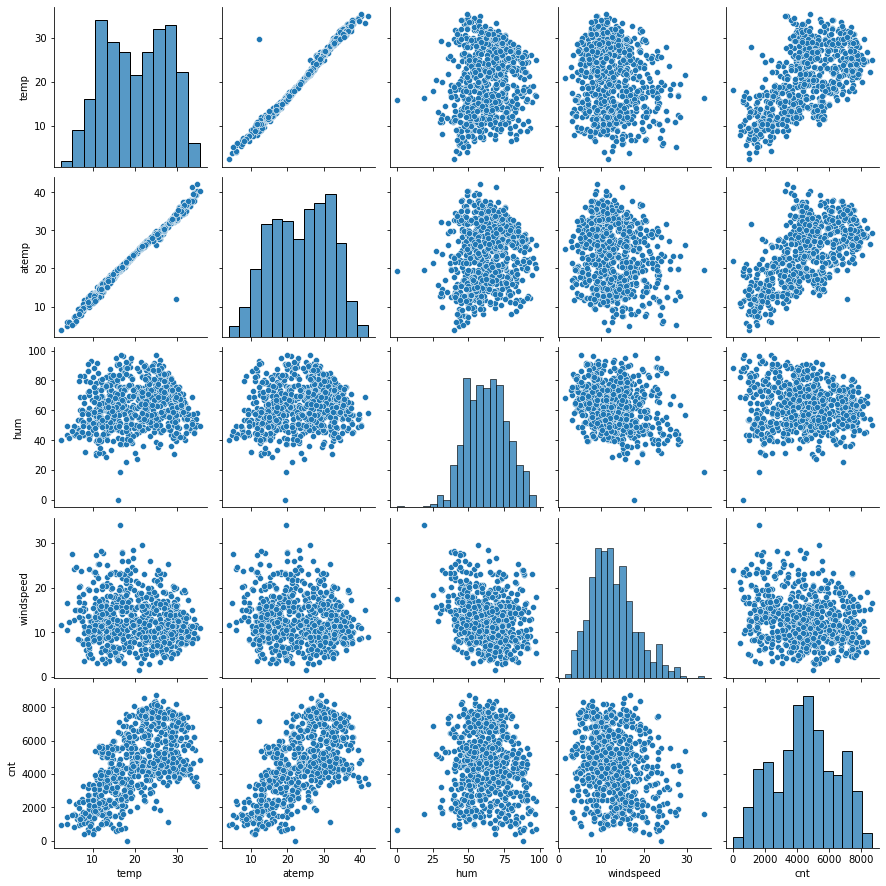

In [15]:
#Pairplot of the numerical column
sns.pairplot(bike[cont_col])

**We can see Linear Relationship between target variable cnt and the column temp, atemp**
- let's check relationship with the heatmap

<AxesSubplot:>

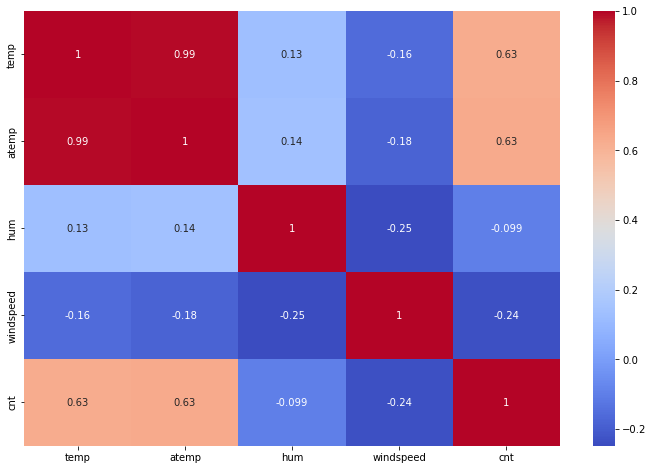

In [16]:
#Plotting Heatmap for correlation
plt.figure(figsize=(12,8))
sns.heatmap(bike[cont_col].corr(),annot=True, cmap='coolwarm')

**We can infer the following**
- strong relationship between the temp and a temp
- target variable(cnt) has same relationship between the temp and atemp
- target variable has negative co relation with the wind speed

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

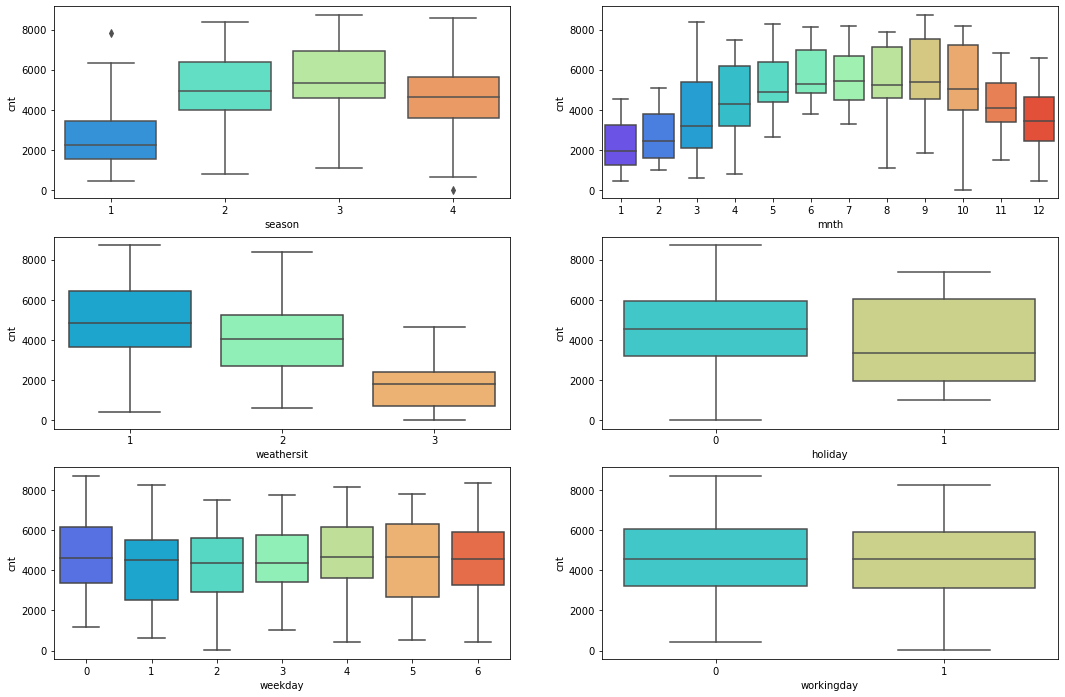

In [17]:
# checking the relationship of the categorical column to the target column using boxplot
f,ax=plt.subplots(3,2,figsize=(18,12))
sns.boxplot(x='season',y='cnt',data=bike, palette='rainbow',ax=ax[0][0])
sns.boxplot(x='mnth',y='cnt',data=bike, palette='rainbow',ax=ax[0][1])
sns.boxplot(x='weathersit',y='cnt',data=bike, palette='rainbow',ax=ax[1][0])
sns.boxplot(x='holiday',y='cnt',data=bike, palette='rainbow',ax=ax[1][1])
sns.boxplot(x='weekday',y='cnt',data=bike, palette='rainbow',ax=ax[2][0])
sns.boxplot(x='workingday',y='cnt',data=bike, palette='rainbow',ax=ax[2][1])


<AxesSubplot:xlabel='yr', ylabel='cnt'>

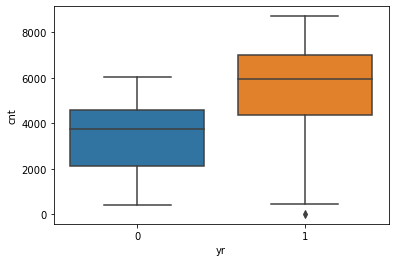

In [18]:
sns.boxplot(x='yr',y='cnt',data=bike)

### Observation
* We can see that each categorical column is dependedent on the target column and that will be good contribution in prediction when preparing the model.
* We will change this categorical column to the dummies variable (0 and 1) for easy computation in the model.

### 5.Data Preprocessing

In [19]:
#checking shape  again
bike.shape

(730, 12)

#### Creating dummies of the categorical column

In [20]:
#creating dummies
bike_season_dummy = pd.get_dummies(bike['season'],prefix='season',drop_first=True)
bike_mnth_dummy = pd.get_dummies(bike['mnth'],prefix='mnth',drop_first=True)
bike_weathersit_dummy = pd.get_dummies(bike['weathersit'],prefix='weathersit',drop_first=True)
bike_weekday_dummy = pd.get_dummies(bike['weekday'],prefix='weekday',drop_first=True)

In [21]:
# combining dummies to the main data
bike_processed=pd.concat([bike,bike_season_dummy,
                          bike_mnth_dummy,bike_weathersit_dummy,
                          bike_weekday_dummy],axis=1)

In [22]:
#Dropping original column as converted to dummies
bike_processed.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)

In [23]:
#New shape of the data
bike_processed.shape

(730, 30)

In [24]:
#First 5 rows with all the column
bike_processed.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weathersit_2,weathersit_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
#Cehcking info of the data
bike_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

### 6.Preparing Data for Modelling

#### Spliting data in train and test

In [26]:
#Spliting data into train and test using sklearn train test split
df_train, df_test = train_test_split(bike_processed,test_size = 0.2, random_state = 42)


### Scalling the data

In [27]:
#creating instance for scaling using Sklearn MinMax scaler
scaler = MinMaxScaler()

In [28]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weathersit_2,weathersit_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
247,0,1,0,27.606653,31.28230,79.0417,14.250632,3351,0,1,...,0,0,1,0,0,0,1,0,0,0
335,0,0,0,12.880847,16.57165,62.5833,6.750518,3940,0,0,...,0,1,0,0,0,0,0,0,0,0
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,...,0,1,0,0,0,0,1,0,0,0
440,1,0,0,21.080847,25.25230,75.5833,7.417168,7836,0,0,...,0,0,1,0,0,0,0,0,0,0
136,0,0,1,23.028347,26.92645,83.7917,18.582718,4123,1,0,...,0,0,1,0,0,0,0,1,0,0


In [29]:
#scalling the required column
scale_cols=['temp','atemp','hum','windspeed','cnt']
df_train[scale_cols] = scaler.fit_transform(df_train[scale_cols])


In [30]:
#Scalling the transforming test dataset
df_test[scale_cols] = scaler.transform(df_test[scale_cols])

In [31]:
#checking shape of scalled dataset
df_train.shape,df_test.shape

((584, 30), (146, 30))

In [32]:
#first 5 rows with all the column of train dataset
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weathersit_2,weathersit_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
247,0,1,0,0.765327,0.717455,0.814513,0.475900,0.382996,0,1,...,0,0,1,0,0,0,1,0,0,0
335,0,0,0,0.317788,0.331261,0.644911,0.195963,0.450759,0,0,...,0,1,0,0,0,0,0,0,0,0
702,1,0,1,0.519232,0.511907,0.756118,0.379454,0.757478,0,0,...,0,1,0,0,0,0,1,0,0,0
440,1,0,0,0.566998,0.559152,0.778874,0.220845,0.898988,0,0,...,0,0,1,0,0,0,0,0,0,0
136,0,0,1,0.626185,0.603102,0.863461,0.637592,0.471813,1,0,...,0,0,1,0,0,0,0,1,0,0


### Dividing into X and Y sets for the model building

In [33]:
# creating X_train and y_train from df_train dataset
X_train = df_train.drop('cnt',axis=1)
y_train = df_train['cnt']

In [34]:
#creating test dataset from the df_test
X_test=df_test.drop('cnt',axis=1)
y_test=df_test['cnt']

## 7. Modelling and Features Selection

In [35]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [36]:
# list of column with rfe
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 13),
 ('mnth_3', False, 2),
 ('mnth_4', False, 11),
 ('mnth_5', False, 3),
 ('mnth_6', False, 10),
 ('mnth_7', True, 1),
 ('mnth_8', False, 12),
 ('mnth_9', True, 1),
 ('mnth_10', False, 4),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('weekday_1', False, 15),
 ('weekday_2', False, 14),
 ('weekday_3', False, 9),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 8)]

In [37]:
#storing the list of column which supports rfe
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_7', 'mnth_9', 'mnth_11', 'mnth_12',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [38]:
#column which do not support rfe
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_8', 'mnth_10', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

### Model-1

In [39]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Building model using statsmodel, for the detailed statistics

In [40]:
# Adding a constant variable 
X_train_1 = sm.add_constant(X_train_rfe)
lm1= sm.OLS(y_train,X_train_1).fit()   # Running the linear model
print(lm1.summary()) # Printing summary of the model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     190.2
Date:                Sun, 28 Aug 2022   Prob (F-statistic):          5.62e-210
Time:                        09:13:32   Log-Likelihood:                 567.43
No. Observations:                 584   AIC:                            -1103.
Df Residuals:                     568   BIC:                            -1033.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2401      0.027      8.737   

In [41]:
# Creating function for calculating VIF for the model

def vif_cal(data):
    vif = pd.DataFrame()
    X = data
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [42]:
#VIF with all the 15 variable
vif_cal(X_train_rfe)

,Features,VIF
3,atemp,1302.01
2,temp,1291.06
4,hum,18.21
7,season_3,8.06
5,windspeed,4.83
8,season_4,4.11
6,season_2,3.96
13,weathersit_2,2.16
0,yr,2.02
11,mnth_11,1.87


**From above we can see that the temp and atemp have high p value and have  multicolinearity so we will drop `atemp` from the featuers and recheck the model**

### Model-2

In [43]:
#dropping atemp variable and storing in X_train_rfe
X_train_rfe = X_train_rfe.drop(["atemp"], axis = 1)

In [44]:
X_train_2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     203.7
Date:                Sun, 28 Aug 2022   Prob (F-statistic):          6.21e-211
Time:                        09:13:32   Log-Likelihood:                 566.94
No. Observations:                 584   AIC:                            -1104.
Df Residuals:                     569   BIC:                            -1038.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2419      0.027      8.827   

In [45]:
vif_cal(X_train_rfe)

,Features,VIF
2,temp,26.60
3,hum,16.77
6,season_3,8.00
4,windspeed,4.51
7,season_4,4.07
5,season_2,3.95
12,weathersit_2,2.13
0,yr,2.02
10,mnth_11,1.87
8,mnth_7,1.82


**Out of temp, hum and season_3 I will drop season 3 and will check the stats of model again**

### Model-3

In [46]:
#Dropping season_3 
X_train_rfe = X_train_rfe.drop(["season_3"], axis = 1)

In [47]:
# creating 3rd model
X_train_3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     209.1
Date:                Sun, 28 Aug 2022   Prob (F-statistic):          5.07e-207
Time:                        09:13:32   Log-Likelihood:                 554.89
No. Observations:                 584   AIC:                            -1082.
Df Residuals:                     570   BIC:                            -1021.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2267      0.028      8.163   

In [48]:
#checking vif of remaining features
vif_cal(X_train_rfe)

,Features,VIF
3,hum,15.78
2,temp,11.37
4,windspeed,4.48
6,season_4,2.53
11,weathersit_2,2.11
0,yr,2.00
5,season_2,1.91
9,mnth_11,1.77
7,mnth_7,1.74
10,mnth_12,1.40


**Now will drop month_7 due to high p-value**

### Model-4

In [49]:
#dropping month_7 from the data
X_train_rfe=X_train_rfe.drop(['mnth_7'],axis=1)
#creating 4th model and printing summary
X_train_4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     225.8
Date:                Sun, 28 Aug 2022   Prob (F-statistic):          1.04e-207
Time:                        09:13:32   Log-Likelihood:                 553.70
No. Observations:                 584   AIC:                            -1081.
Df Residuals:                     571   BIC:                            -1025.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2269      0.028      8.159   

In [50]:
vif_cal(X_train_rfe)

,Features,VIF
3,hum,15.38
2,temp,8.33
4,windspeed,4.46
6,season_4,2.42
10,weathersit_2,2.11
0,yr,2.00
8,mnth_11,1.77
5,season_2,1.64
9,mnth_12,1.40
7,mnth_9,1.23


**Now will drop hum due to high VIF**

In [51]:
#dropping humidity from the data
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)
#creating 5th model and printing summary
X_train_5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     235.5
Date:                Sun, 28 Aug 2022   Prob (F-statistic):          3.60e-204
Time:                        09:13:32   Log-Likelihood:                 542.51
No. Observations:                 584   AIC:                            -1061.
Df Residuals:                     572   BIC:                            -1009.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1240      0.018      7.043   

In [52]:
#checking the VIF of the remaining features
vif_cal(X_train_rfe)

,Features,VIF
2,temp,4.05
3,windspeed,3.75
5,season_4,2.29
0,yr,1.99
7,mnth_11,1.75
4,season_2,1.62
9,weathersit_2,1.54
8,mnth_12,1.32
6,mnth_9,1.23
10,weathersit_3,1.10


#### So at this stage our models looks good 
- all `VIF` are less than 5
- and `p value` are below 0.05
- we will consider this model if all other assumptions are passed.

#### Fixing the test dataset as per the sm model

In [53]:
#test dataset head
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weathersit_2,weathersit_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
468,1,0,0,0.543115,0.536771,0.518248,0.421436,0.855729,1,0,...,0,0,0,0,0,0,0,0,0,0
148,0,0,1,0.758058,0.704203,0.843709,0.479005,0.548320,1,0,...,0,0,0,0,0,1,0,0,0,0
302,0,0,1,0.324018,0.317998,0.642765,0.385676,0.380695,0,0,...,0,0,0,0,0,1,0,0,0,0
355,0,0,0,0.453814,0.455552,0.780592,0.062226,0.350437,0,0,...,0,1,1,0,0,0,0,0,0,1
515,1,0,1,0.773634,0.724915,0.507943,0.432344,0.841694,1,0,...,0,0,0,0,0,0,0,0,1,0


In [54]:
#creating variable for the columns as per the selected features 
cols_test=X_train_rfe.columns
cols_test

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_2', 'season_4', 'mnth_9',
       'mnth_11', 'mnth_12', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [55]:
# creating test data with same featues and adding constant
X_test=X_test[cols_test]
X_test=sm.add_constant(X_test)



In [56]:
#Sanity check of the columns
X_test.shape,X_train_5.shape

((146, 12), (584, 12))

In [57]:
#predicting test result from model
y_pred=lm5.predict(X_test)


In [58]:
y_pred

468    0.691467
148    0.571713
302    0.417035
355    0.236608
515    0.815514
         ...   
404    0.444624
390    0.456060
218    0.535854
135    0.535527
260    0.471349
Length: 146, dtype: float64

In [59]:
#printing parameters
lm5.params

const           0.123996
yr              0.230028
holiday        -0.077765
temp            0.543503
windspeed      -0.113740
season_2        0.090192
season_4        0.160801
mnth_9          0.088101
mnth_11        -0.048163
mnth_12        -0.052159
weathersit_2   -0.074800
weathersit_3   -0.275675
dtype: float64

In [60]:
#printing r2 score created from the stats model
r2_score(y_test, y_pred)


0.8359125505589174

## 8.Final Modelling
- As per stats our 5th model looks okk we will finalise this model.
- We will again create this model using Sklearn
- We will select the same feature as in our model -5
- Fit the model using Liner Regression instance
- Predict the test result and compare with the actual result.


In [61]:
#features selected from RFE
X_train_5.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_2', 'season_4',
       'mnth_9', 'mnth_11', 'mnth_12', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [62]:
#Mapping same features to the new dataset
bike_processed_new=bike_processed[['yr', 'holiday', 'temp', 'windspeed', 'season_2', 'season_4',
       'mnth_9', 'mnth_11', 'mnth_12', 'weathersit_2', 'weathersit_3','cnt']]

In [63]:
#columns for scalling
scale_column=['temp','windspeed','cnt']

In [64]:
#Splitting data into train test 
df_train,df_test= train_test_split(bike_processed_new,test_size=0.2,random_state=42)

In [65]:
#creating instance for the min max scaler
scaler=MinMaxScaler()

In [66]:
#sacling train dataset scale_column
df_train[scale_column] = scaler.fit_transform(df_train[scale_column])

In [67]:
#applying scalling on the test dataset
df_test[scale_column] = scaler.transform(df_test[scale_column])

In [68]:
# creating train and test dataset
X_train=df_train.drop('cnt',axis=1)
X_test=df_test.drop('cnt',axis=1)

In [69]:
#traindata head
X_train.head()

,yr,holiday,temp,windspeed,season_2,season_4,mnth_9,mnth_11,mnth_12,weathersit_2,weathersit_3
247,0,1,0.765327,0.475900,0,0,1,0,0,1,0
335,0,0,0.317788,0.195963,0,1,0,0,1,0,0
702,1,0,0.519232,0.379454,0,1,0,0,1,0,0
440,1,0,0.566998,0.220845,0,0,0,0,0,1,0
136,0,0,0.626185,0.637592,1,0,0,0,0,1,0


In [70]:
#creating train and test of target
y_train=df_train['cnt']
y_test=df_test['cnt']

In [71]:

y_test

468    0.855729
148    0.548320
302    0.380695
355    0.350437
515    0.841694
         ...   
404    0.438104
390    0.466291
218    0.432927
135    0.452830
260    0.489185
Name: cnt, Length: 146, dtype: float64

### Feature Scaling

In [72]:
# creating instance of the Linear regression
lm = LinearRegression()

In [73]:
#Fitting the model
lm.fit(X_train,y_train)

LinearRegression()

In [74]:
#Prediction of the test result
predictions = lm.predict(X_test)

In [75]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 0.23002824 -0.07776468  0.54350259 -0.11374019  0.09019249  0.16080086
  0.08810127 -0.04816313 -0.05215947 -0.07479976 -0.27567509]


In [76]:
print('Intercept:', lm.intercept_)

Intercept: 0.12399583969028843


In [77]:
#r2 score from the sklearn Linear regression model
r2_score(y_test,predictions)

0.8359125505589173

**We have exactly same score as per the stats model**

## 9.Assumptions

### Normally distributed error term

<AxesSubplot:xlabel='cnt', ylabel='Density'>

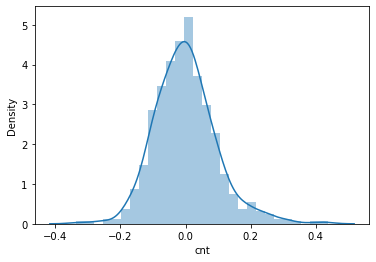

In [78]:
y_train_pred = lm.predict(X_train)
sns.distplot(y_train_pred - y_train)


**We can see that error term are normally distributed ad mean is zero.**

Text(0, 0.5, 'Residuals')

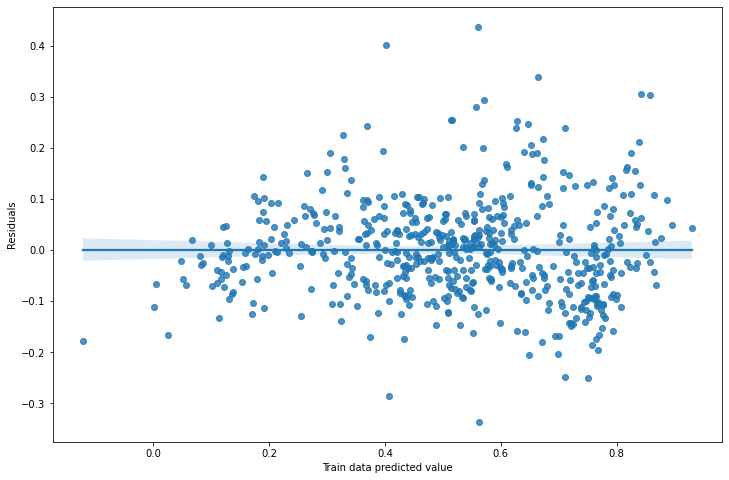

In [79]:
plt.figure(figsize=(12,8))
sns.regplot(x=y_train_pred, y=y_train_pred - y_train)
plt.xlabel('Train data predicted value')
plt.ylabel('Residuals')


### Multicorrelation

In [80]:
vif_cal(X_train)

,Features,VIF
2,temp,4.05
3,windspeed,3.75
5,season_4,2.29
0,yr,1.99
7,mnth_11,1.75
4,season_2,1.62
9,weathersit_2,1.54
8,mnth_12,1.32
6,mnth_9,1.23
10,weathersit_3,1.10


<AxesSubplot:>

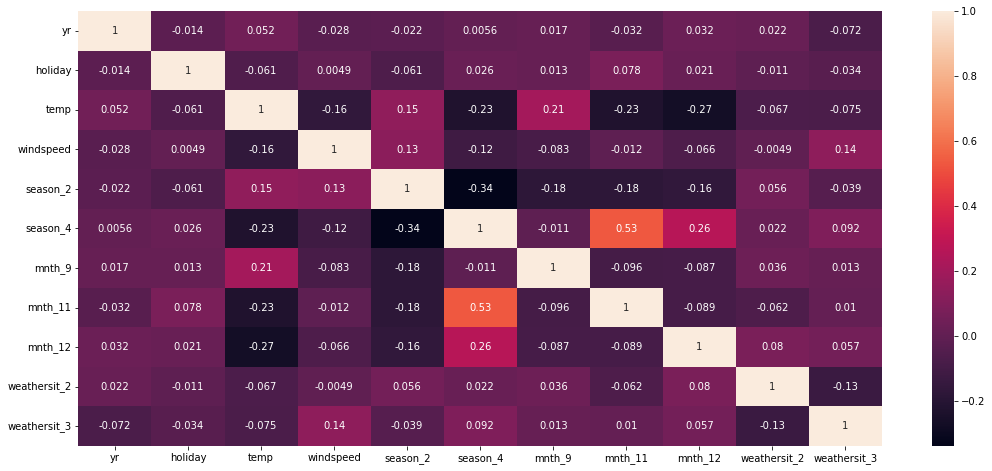

In [81]:
plt.figure(figsize=(18,8))
sns.heatmap(X_train.corr(),annot=True)

**We can see that all the features VIF is less than 5 so there is no Multicorrelation. Also from the heatmap there is no strong co relation between the features**

### Homoscedasticity

Text(0, 0.5, 'predicted value of train dataset')

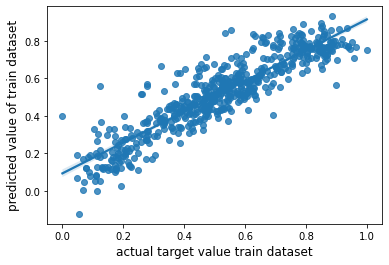

In [82]:
sns.regplot(x=y_train, y=y_train_pred)
plt.xlabel('actual target value train dataset',size=12)
plt.ylabel('predicted value of train dataset',size=12)

**We can see that data is not concentrated at the certain value they are having equal variance**

## 10.Evaluating Final Model

In [83]:
print('MAE:',mean_absolute_error(y_test, predictions))
print('MSE:',mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 0.06625892791441651
MSE: 0.007434003777710253
RMSE: 0.0862206690864218


In [84]:
#calculating r2 score
r2_score(y_test,predictions)

0.8359125505589173

Text(0.5, 1.0, 'Y_test Vs Predictions')

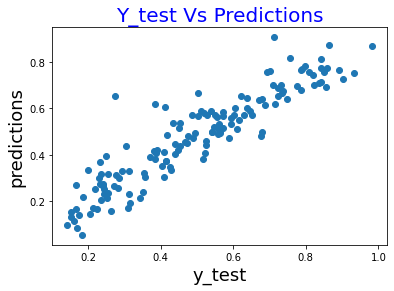

In [85]:
# Plotting y_test and predictions 
plt.scatter(y_test, y_pred)
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('predictions', fontsize = 18) 
plt.title('Y_test Vs Predictions',fontsize=20,color='blue')

### Calculating adjusted r-square

In [86]:
def adj_r2(x,y):
    r2 = lm.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [87]:
adj_r2(X_test,y_test)

0.8224426853062912

In [88]:
adj_r2(X_train,y_train)

0.8156747375755051

In [89]:
model_summary = pd.DataFrame(data = X_train.columns.values, columns=['Features'])
model_summary ['Coefficients'] = lm.coef_
model_summary

,Features,Coefficients
0,yr,0.230028
1,holiday,-0.077765
2,temp,0.543503
3,windspeed,-0.113740
4,season_2,0.090192
5,season_4,0.160801
6,mnth_9,0.088101
7,mnth_11,-0.048163
8,mnth_12,-0.052159
9,weathersit_2,-0.074800


In [90]:
lm.intercept_

0.12399583969028843

### Final Conclusion

### Equation for the Linear Regression

cnt= 0.12399 + **year** X 0.230028 + **holiday** X -0.077765 + **temp**X 0.543503 + **windspeed** X -0.113740 + **season_2**X0.090192 + **season_4**X0.160801 + **mnth_9**x0.088101 + **mnth_11**x -0.048163 + **mnth_12** X-0.052159 + **weathersit_2**x-0.074800 +**weathersit_3** X-0.275675

### Top 3 features for predicting target are
- Temperature: coff is 0.5435 means 1 unit increase in temp increase the hire of 0.5435 times.
- Weathersit_3: coff is -0.2756 means with respect to weathersituation 1 unit increse to situation 3 will decrease the hire by .2756
- year: coff is 0.23 means unit increase in year will increase hire of bike by .23.

**We can also see that holiday,season_2,month_9,month_11,month_12 and weathersit 2 has very less weightage so these should not be considered lot for business**